# Assignment #3 (demo). Decision trees with a toy task and the UCI Adult dataset

```{figure} /_static/img/ods_stickers.jpg
```

**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>

Authors: [Maria Sumarokova](https://www.linkedin.com/in/mariya-sumarokova-230b4054/), and [Yury Kashnitsky](https://www.linkedin.com/in/festline/). Translated and edited by Gleb Filatov, Aleksey Kiselev, [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), [Egor Polusmak](https://www.linkedin.com/in/egor-polusmak/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/). All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

Same assignment as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution). Fill in the answers in the [web-form](https://docs.google.com/forms/d/1wfWYYoqXTkZNOPy1wpewACXaj2MZjBdLOL58htGWYBA/edit).

Let's start by loading all necessary libraries:

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Part 1. Toy dataset "Will They? Won't They?"

Your goal is to figure out how decision trees work by walking through a toy problem. While a single decision tree does not yield outstanding results, other performant algorithms like gradient boosting and random forests are based on the same idea. That is why knowing how decision trees work might be useful.

We'll go through a toy example of binary classification - Person A is deciding whether they will go on a second date with Person B. It will depend on their looks, eloquence, alcohol consumption (only for example), and how much money was spent on the first date.

### Creating the dataset

In [ ]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [ ]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

### Training data

In [ ]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

### Test data

In [ ]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

In [ ]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

In [ ]:
df_test

### Draw a decision tree (by hand or in any graphics editor) for this dataset. Optionally you can also implement tree construction and draw it here.


1\. What is the entropy $S_0$ of the initial system? By system states, we mean values of the binary feature "Will_go" - 0 or 1 - two states in total.

In [ ]:
y

In [ ]:
from math import log

In [ ]:
So = -3/7 * log(3/7, 2) - 4/7 * log(4/7, 2)
So

2\. Let's split the data by the feature "Looks_handsome". What is the entropy $S_1$ of the left group - the one with "Looks_handsome". What is the entropy $S_2$ in the opposite group? What is the information gain (IG) if we consider such a split?

In [35]:
handsome_df = pd.concat([df_train["Looks_handsome"], y], axis=1)
handsome_df.sort_values('Looks_handsome')

,Looks_handsome,Will_go
3,0,1
4,0,1
5,0,0
0,1,0
1,1,1
2,1,0
6,1,0


In [39]:
S1 = -2/3 * log(2/3, 2) - 1/3 * log(1/3, 2)
S2 = -1/4 * log(1/4, 2) - 3/4 * log(3/4, 2)
print(f'{S1=}, {S2=}')
IG_1_2 = So - 3/7 * S1 - 4/7 * S2
IG_1_2

S1=0.9182958340544896, S2=0.8112781244591328


0.12808527889139454

### Train a decision tree using sklearn on the training data. You may choose any depth for the tree.

In [21]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [16]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
clf_tree = DecisionTreeClassifier(criterion='entropy')
clf_tree.fit(df_train, y)

In [40]:
from sklearn.tree import plot_tree

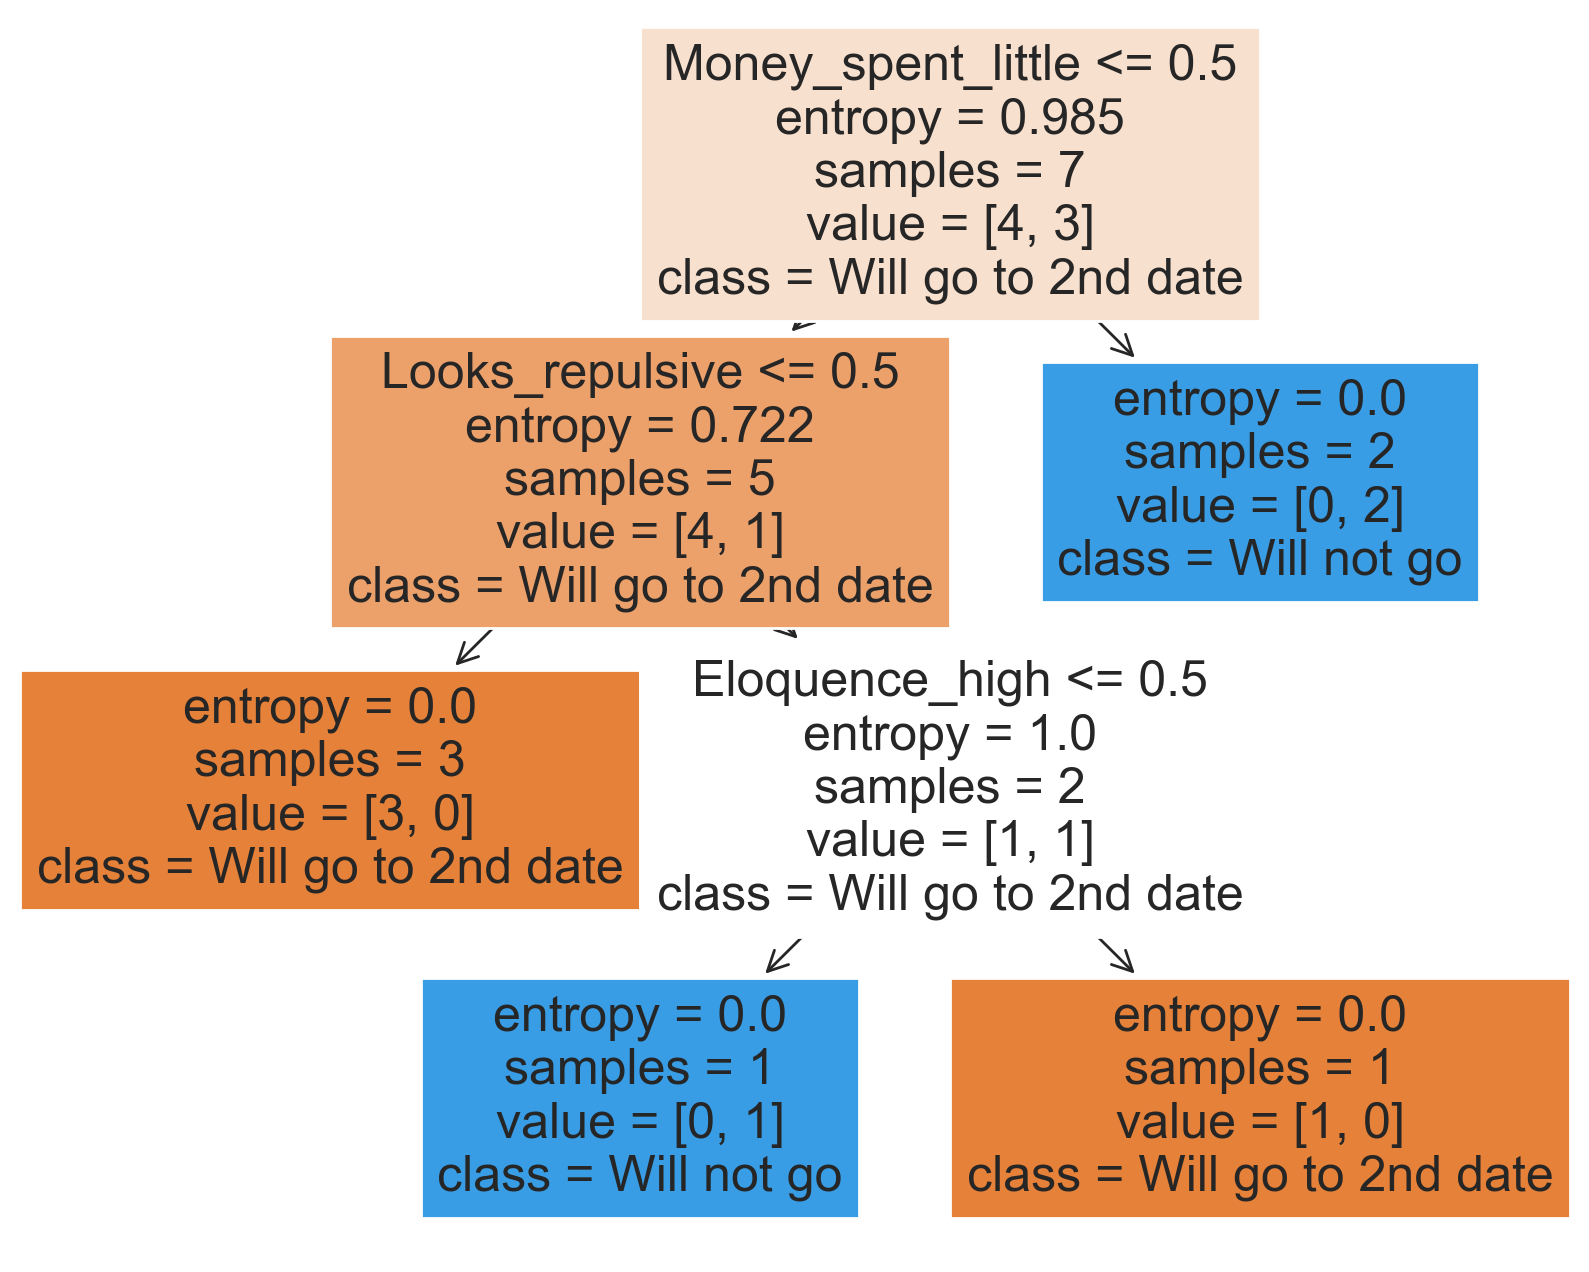

In [43]:
plot_tree(clf_tree, feature_names=df_train.columns, class_names=['Will go to 2nd date', 'Will not go'], filled=True)
plt.show()

## Part 2. Functions for calculating entropy and information gain.

Consider the following warm-up example: we have 9 blue balls and 11 yellow balls. Let ball have label **1** if it is blue, **0** otherwise.

In [44]:
balls = [1 for i in range(9)] + [0 for i in range(11)]

<img src = '../../_static/img/decision_tree3.png'>

Next split the balls into two groups:

<img src = '../../_static/img/decision_tree4.png'>

In [ ]:
# two groups
balls_left = [1 for i in range(8)] + [0 for i in range(5)]  # 8 blue and 5 yellow
balls_right = [1 for i in range(1)] + [0 for i in range(6)]  # 1 blue and 6 yellow
balls_left

### Implement a function to calculate the Shannon Entropy

In [47]:
from collections import Counter

In [51]:
def entropy(a_list):
    counter = Counter(a_list)
    size = len(a_list)
    probabilities = [val / size for val in counter.values()]
    return sum([-p * log(p, 2) for p in probabilities])    

Tests

In [52]:
print(entropy(balls))  # 9 blue и 11 yellow
print(entropy(balls_left))  # 8 blue и 5 yellow
print(entropy(balls_right))  # 1 blue и 6 yellow
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


3\. What is the entropy of the state given by the list **balls_left**?

4\. What is the entropy of a fair dice? (where we look at a dice as a system with 6 equally probable states)?

In [55]:
from typing import Iterable
# information gain calculation
def information_gain(root: Iterable, left: Iterable, right: Iterable) -> float:
    """ root - initial data, left and right - two partitions of initial data"""
    left_size, right_size = len(left), len(right)
    root_size = left_size + right_size
    return entropy(root) - left_size/root_size * entropy(left) - right_size/root_size * entropy(right)

In [56]:
information_gain(balls, balls_left, balls_right)

0.16088518841412436

5\. What is the information gain from splitting the initial dataset into **balls_left** and **balls_right** ?

In [90]:
def information_gains(X: pd.DataFrame, y: pd.Series):
    """Outputs information gain when splitting with each feature"""
    x = X.copy()
    features = x.columns
    x['target'] = y
    igs = []
    for feature in features:
        splitted = []
        for feature_val, data in x.groupby(feature):
            splitted.append(data['target'])
        if len(splitted) >= 2:    
            ig = information_gain(x['target'], *splitted)
        else:
            ig = 0
#         print(f"For {feature=} got IG = {ig}")
        igs.append(ig) 
    return igs

In [87]:
information_gains(df_train, y)

For feature='Alcoholic_beverage_no' got IG = 0.005977711423774124
For feature='Looks_handsome' got IG = 0.12808527889139454
For feature='Money_spent_little' got IG = 0.46956521111470706
For feature='Alcoholic_beverage_yes' got IG = 0.005977711423774124
For feature='Looks_repulsive' got IG = 0.12808527889139454
For feature='Eloquence_average' got IG = 0.02024420715375619
For feature='Eloquence_high' got IG = 0.2916919971380598
For feature='Money_spent_lots' got IG = 0.46956521111470706


[0.005977711423774124,
 0.12808527889139454,
 0.46956521111470706,
 0.005977711423774124,
 0.12808527889139454,
 0.02024420715375619,
 0.2916919971380598,
 0.46956521111470706]

In [107]:
def decision_tree(X, y):
    igs = information_gains(X, y)
    max_ig = max(igs)
    best_feature_idx = igs.index(max_ig)
    best_feature = X.columns[best_feature_idx]
    print(f'{best_feature=} with {max_ig=} for {X.shape[0]} elems')
    
    if max_ig > 0:
        splits = [(X[X[best_feature] == feat_val], y[X[best_feature] == feat_val]) for feat_val, data in X.groupby(best_feature)]
        for i, split in enumerate(splits, start=1):
            print(f'\nSplit number {i} for node with {split[0].shape[0]} elems')
            decision_tree(split[0], split[1])
#     return splits

In [108]:
decision_tree(df_train, y)

best_feature='Money_spent_little' with max_ig=0.46956521111470706 for 7 elems

Split number 1 for node with 5 elems
best_feature='Looks_handsome' with max_ig=0.3219280948873623 for 5 elems

Split number 1 for node with 2 elems
best_feature='Eloquence_high' with max_ig=1.0 for 2 elems

Split number 1 for node with 1 elems
best_feature='Alcoholic_beverage_no' with max_ig=0 for 1 elems

Split number 2 for node with 1 elems
best_feature='Alcoholic_beverage_no' with max_ig=0 for 1 elems

Split number 2 for node with 3 elems
best_feature='Alcoholic_beverage_no' with max_ig=0.0 for 3 elems

Split number 2 for node with 2 elems
best_feature='Alcoholic_beverage_no' with max_ig=0.0 for 2 elems


### Optional:
- Implement a decision tree building algorithm by calling `information_gains` recursively
- Plot the resulting tree

## Part 3. The "Adult" dataset

**Dataset description:**

[Dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/adult) UCI Adult (no need to download it, we have a copy in the course repository): classify people using demographic data - whether they earn more than \$50,000 per year or not.

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**Target** – earnings level, categorical (binary) feature.

**Reading train and test data**

In [115]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "../../data/"

In [116]:
data_train = pd.read_csv(DATA_PATH + "adult_train.csv", sep=";")

In [ ]:
data_train.tail()

In [ ]:
data_test = pd.read_csv(DATA_PATH + "adult_test.csv", sep=";")

In [ ]:
data_test.tail()

In [ ]:
data_test['Target'].unique()

In [ ]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[
    (data_test["Target"] == " >50K.") | (data_test["Target"] == " <=50K.")
]

# encode target variable as integer
data_train.loc[data_train["Target"] == " <=50K", "Target"] = 0
data_train.loc[data_train["Target"] == " >50K", "Target"] = 1

data_test.loc[data_test["Target"] == " <=50K.", "Target"] = 0
data_test.loc[data_test["Target"] == " >50K.", "Target"] = 1

**Primary data analysis**

In [ ]:
data_test.describe(include="all").T

In [ ]:
data_train["Target"].value_counts()

In [ ]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = int(data_train.shape[1] / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
#         data_train[column].hist()
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2);

**Checking data types**

In [ ]:
data_train.dtypes

In [ ]:
data_test.dtypes

As we see, in the test data, age is treated as type **object**. We need to fix this.

In [ ]:
data_test["Age"] = data_test["Age"].astype(int)

Also we'll cast all **float** features to **int** type to keep types consistent between our train and test data.

In [ ]:
data_test["fnlwgt"] = data_test["fnlwgt"].astype(int)
data_test["Education_Num"] = data_test["Education_Num"].astype(int)
data_test["Capital_Gain"] = data_test["Capital_Gain"].astype(int)
data_test["Capital_Loss"] = data_test["Capital_Loss"].astype(int)
data_test["Hours_per_week"] = data_test["Hours_per_week"].astype(int)

**Fill in missing data for continuous features with their median values, for categorical features with their mode.**

In [ ]:
# choose categorical and continuous features from data

categorical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data_train.columns if data_train[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

In [ ]:
# we see some missing values
data_train.info()

In [ ]:
# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)

for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [ ]:
# no more missing values
data_train.info()

We'll dummy code some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. It can be done via pandas method **get_dummies**

In [ ]:
data_train = pd.concat(
    [data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])],
    axis=1,
)

data_test = pd.concat(
    [data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])],
    axis=1,
)

In [ ]:
set(data_train.columns) - set(data_test.columns)

In [ ]:
data_train.shape, data_test.shape

**There is no Holland in the test data. Create new zero-valued feature.**

In [ ]:
data_test["Country_ Holand-Netherlands"] = 0

In [ ]:
set(data_train.columns) - set(data_test.columns)

In [ ]:
data_train.head(2)

In [ ]:
data_test.head(2)

In [ ]:
X_train = data_train.drop(["Target"], axis=1)
y_train = data_train["Target"]

X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

### 3.1 Decision tree without parameter tuning

Train a decision tree **(DecisionTreeClassifier)** with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter **random_state = 17** for results reproducibility.

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit) (read-only in a JupyterBook, pls run jupyter-notebook to edit)
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

Make a prediction with the trained model on the test data.

In [159]:
tree_predictions = tree.predict(X_test)

In [160]:
accuracy_score(y_test, tree_predictions)

0.8447884036607088

6\. What is the test set accuracy of a decision tree with maximum tree depth of 3 and **random_state = 17**?

### 3.2 Decision tree with parameter tuning

Train a decision tree **(DecisionTreeClassifier, random_state = 17).** Find the optimal maximum depth using 5-fold cross-validation **(GridSearchCV)**.

In [163]:
tree_params = {"max_depth": range(2, 11)}

locally_best_tree = GridSearchCV(tree, tree_params, cv=5)

locally_best_tree.best_params_, locally_best_tree.best_score_

({'max_depth': 9}, 0.8565770273854106)

Train a decision tree with maximum depth of 9 (it is the best **max_depth** in my case), and compute the test set accuracy. Use parameter **random_state = 17** for reproducibility.

In [164]:
locally_best_tree.fit(X_train, y_train)
tuned_tree_predictions = locally_best_tree.predict(X_test)
accuracy_score(y_test, tuned_tree_predictions)

0.847798046803022

7\. What is the test set accuracy of a decision tree with maximum depth of 9 and **random_state = 17**?

### 3.3 (Optional) Random forest without parameter tuning

Let's take a sneak peek of upcoming lectures and try to use a random forest for our task. For now, you can imagine a random forest as a bunch of decision trees, trained on slightly different subsets of the training data.

Train a random forest **(RandomForestClassifier)**. Set the number of trees to 100 and use **random_state = 17**.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(X_train, y_train) 

Make predictions for the test data and assess accuracy.

In [166]:
preds = rf.predict(X_test)
accuracy_score(y_test, preds)

0.8585467723112831

### 3.4 (Optional) Random forest with parameter tuning

Train a random forest **(RandomForestClassifier)**. Tune the maximum depth and maximum number of features for each tree using **GridSearchCV**.

In [ ]:
forest_params = {'max_depth': range(10, 21),
                'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(rf, param_grid=forest_params, cv=5, verbose=1, n_jobs=4) 

locally_best_forest.fit(X_train, y_train) 

Make predictions for the test data and assess accuracy.

In [170]:
accuracy_score(y_test, locally_best_forest.predict(X_test))

0.8628462625145875